In [18]:
import numpy as np 
import scipy as sp
import pandas as pd
from scipy.optimize import root
import matplotlib.pyplot as plt
from numpy.linalg import eigvals


# Maier Saupe Model 

The free energy is given by: 
$$ 
f(\beta,\overline{\mu}) = + \frac{1}{2}\sum_{\mu,\nu}Q^2_{\mu\nu} - \frac{1}{\beta J}\ln \left[ 6 + 2 e^{\beta\overline{\mu} - \frac{\beta J}{2}\sum_\mu Q_{\mu\mu}}\sum_{\mu}e^{\frac{3}{2}\beta JQ_{\mu\mu}} \right]
$$
where $\mu=x,y,z$. Here we perform the chenge of variables $S \equiv Q_{zz}$ and $\eta \equiv Q_{yy} - Q_{xx}$

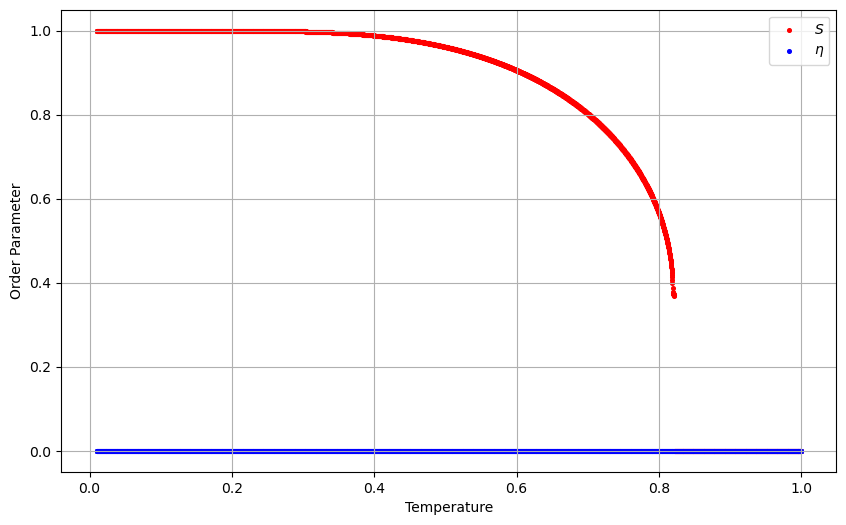

In [32]:
def first_eqs(t,m,S,n): 
    exp1=np.exp((3/2)*n/t + m)
    exp2=np.exp((3/4)*(S+n)/t)
    exp3=np.exp((3/2)*S/t + m) 
    exp4=np.exp(m)

    nom = exp4*(1+2*S) + exp1*(1+2*S) + 2*exp2*(exp3*(-1+S)+3*S) 
    denom = 2*(3*exp2+exp4 + exp1 + exp2*exp4)

    return nom/denom 

def seccond_eqs(t,m,S,n): 
    exp1=np.exp((3/2)*n/t)
    exp2=np.exp((3/4)*(S+n)/t)
    exp3=np.exp((3/4)*(3*S+n)/t)
    exp4=np.exp(m) 

    nom = 6*exp2*n + exp4*(3+2*n+2*exp3*n+exp1*(-3+2*n))
    denom = 2*(3*exp2 + exp4 + exp1*exp4 + exp3*exp4) 

    return nom/denom 

m_sample= np.linspace(0.0, 10.0, 20)
i=0

for m in m_sample:
    i+=1
    T_vals = np.linspace(0.01, 1.0, 5000)
    S_vals = []
    n_vals = []

    for t in T_vals:
        sol = root(lambda x : [first_eqs(t,m,x[0],x[1]), seccond_eqs(t,m,x[0],x[1])], [S_vals[-1], n_vals[-1]] if S_vals else [1.0, 0.0],  method='lm')
        S_vals.append(sol.x[0])
        n_vals.append(sol.x[1]) 

    np.savetxt(f'Data/Test{i}.txt', [p for p in zip(S_vals, n_vals, T_vals)], delimiter=' ', fmt='%f' , 
            header=f'Constant m: {m}\nS_vals  n_vals  T_vals',)


# Plot
fig1=plt.figure(figsize=(10, 6))

plt.scatter(T_vals, S_vals, label=r'$S$', color='red',s=7)
plt.scatter(T_vals, n_vals, label=r'$\eta$', color='blue',s=7)

plt.xlabel('Temperature')
plt.ylabel('Order Parameter')
plt.legend()
plt.grid(True) 
plt.show()
